## Import modules

In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
# import scarches as sca

In [2]:
import session_info
session_info.show()

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, facecolor='white', color_map = 'RdPu',)

## Read in data

In [4]:
# original adata
adata_ori = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/RNA_adult-8reg_raw_rmdblcls_cellstate-annotated.h5ad')

# rename cell_states
adata_ori.obs.replace({'cell_state':{
    'FB4':'FB4_activated',
    'vCM3':'vCM3_stressed',
    'NC1':'NC1_glial',
    'NC2':'NC2_glial_NGF+',
    'NC3':'NC3_glial',
    'NC4':'NC4_glial',
    'NC5':'NC5_glial',
    'NC6':'NC6_schwann',
    'EC7_atria':'EC7_endocardial',
}},inplace=True)

adata_ori.obs['cell_state']=adata_ori.obs['cell_state'].astype('category')
adata_ori.obs['cell_state'].cat.reorder_categories([
    'SAN_P_cell','AVN_P_cell','AVN_bundle_cell',
    'aCM1','aCM2', 'aCM3', 'aCM4', 'aCM5', 
    'vCM1', 'vCM2','vCM3_stressed', 'vCM4', 'vCM5', 
     'EC1_cap','EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven','EC7_endocardial',
       'EC8_ln', 'EC9_FB-like', 'EC10_CMC-like', 
    'PC1_vent', 'PC2_atria', 'PC3_str', 'PC4_CMC-like', 'SMC1_basic', 'SMC2_art',
    'FB1', 'FB2', 'FB3', 'FB4_activated','FB5', 'FB6',
    'Meso',
    'Adip1', 'Adip2', 'Adip3', 'Adip4',
   'NC1_glial','NC2_glial_NGF+', 'NC3_glial', 'NC4_glial', 'NC5_glial','NC6_schwann',
    'CD4+T_naive', 'CD4+T_act','CD4+T_Th1', 'CD4+T_Th2', 'CD4+T_Th17', 'CD4+T_Tfh',
       'CD4+T_reg', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans','MAIT-like','gdT', 
    'NK_CD16hi', 'NK_CD56hi', 'ILC', 
     'B', 'B_plasma', 
    'CD14+Mo',  'CD16+Mo', 'MoMP',
    'LYVE1+IGF1+MP','LYVE1+TIMD4+MP', 'LYVE1+MP_cycling','DC','Neut','Mast',
    'T/NK_cycling', 'unclassified', 
     ], inplace=True)

adata_ori

AnnData object with n_obs × n_vars = 629041 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_name_multiome-2'
    uns: 'cell_or_nuclei_colors', 'cell_state_HCAv1_colors', 'cell_state_colors', 'cell_state_scNym_colors', 'cell_type_colors', 'donor_colors', 'kit_10x_colors', 'leiden_scVI_colors', 'region_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous', 'latent_gene_encoding'
    obsp: 'connectivities', 'distances'

In [5]:
# new data
adata_new = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/multiome_RNA_adult_new-SAN-AVN_raw_rmdblcls.h5ad')
adata_new.var = adata_new.var[['gene_name']]
adata_new

AnnData object with n_obs × n_vars = 75255 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'batch_key', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'clus20', 'doublet_cls', 'cell_state_scNym', 'cell_state_scNym_confidence'
    var: 'gene_name'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous', 'latent_gene_encoding'

In [13]:
# concatenate
adata = adata_ori.concatenate(adata_new, 
                              index_unique = None, 
                              batch_key= 'original_or_new',
                                  batch_categories=['original','new'])
del adata.obsm['X_scVI']
del adata.obsm['X_umap']
del adata.obsm['_scvi_extra_continuous']
del adata.obsm['latent_gene_encoding']

adata

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'

## Add scArches latent space

In [14]:
adata.obsm['X_scArches'] = pd.read_csv('./full_latent.X.csv',index_col=0).reindex(adata.obs_names)

In [15]:
df = pd.read_csv('./full_latent.obs.csv',index_col=0)
df.rename(columns={'predictions':'scANVI_predictions'},inplace=True)
adata.obs[df.columns] = df.reindex(adata.obs_names)
adata.obs.head()

sangerID combinedID donor donor_type  \
barcode                                                                         
HCAHeart7606896_GATGAGGCACGGCTAC  HCAHeart7606896         na    D1        DBD   
HCAHeart7606896_CGCTTCACATTTGCCC  HCAHeart7606896         na    D1        DBD   
HCAHeart7606896_GTTAAGCAGAGACTAT  HCAHeart7606896         na    D1        DBD   
HCAHeart7606896_TCGCGTTGTAAGAGGA  HCAHeart7606896         na    D1        DBD   
HCAHeart7606896_GCTGCGAGTGTTGGGA  HCAHeart7606896         na    D1        DBD   

                                 region region_finest    age  gender facility  \
barcode                                                                         
HCAHeart7606896_GATGAGGCACGGCTAC     AX            AX  50-55  Female   Sanger   
HCAHeart7606896_CGCTTCACATTTGCCC     AX            AX  50-55  Female   Sanger   
HCAHeart7606896_GTTAAGCAGAGACTAT     AX            AX  50-55  Female   Sanger   
HCAHeart7606896_TCGCGTTGTAAGAGGA     AX            AX  50-55  Female   Sanger   
HCAHeart7606896_GCTGCGAGTGTTGGGA     AX            AX  50-55  Female   Sanger   

                                 cell_or_nuclei  ... latent_cell_probability  \
barcode                                          ...                           
HCAHeart7606896_GATGAGGCACGGCTAC           Cell  ...                     NaN   
HCAHeart7606896_CGCTTCACATTTGCCC           Cell  ...                     NaN   
HCAHeart7606896_GTTAAGCAGAGACTAT           Cell  ...                     NaN   
HCAHeart7606896_TCGCGTTGTAAGAGGA           Cell  ...                     NaN   
HCAHeart7606896_GCTGCGAGTGTTGGGA           Cell  ...                     NaN   

                                 latent_scale n_counts  _scvi_batch  \
barcode                                                               
HCAHeart7606896_GATGAGGCACGGCTAC          NaN      NaN          NaN   
HCAHeart7606896_CGCTTCACATTTGCCC          NaN      NaN          NaN   
HCAHeart7606896_GTTAAGCAGAGACTAT          NaN      NaN          NaN   
HCAHeart7606896_TCGCGTTGTAAGAGGA          NaN      NaN          NaN   
HCAHeart7606896_GCTGCGAGTGTTGGGA          NaN      NaN          NaN   

                                  _scvi_labels  clus20  doublet_cls  \
barcode                                                               
HCAHeart7606896_GATGAGGCACGGCTAC           NaN     NaN          NaN   
HCAHeart7606896_CGCTTCACATTTGCCC           NaN     NaN          NaN   
HCAHeart7606896_GTTAAGCAGAGACTAT           NaN     NaN          NaN   
HCAHeart7606896_TCGCGTTGTAAGAGGA           NaN     NaN          NaN   
HCAHeart7606896_GCTGCGAGTGTTGGGA           NaN     NaN          NaN   

                                  original_or_new              batch  \
barcode                                                                
HCAHeart7606896_GATGAGGCACGGCTAC         original  D1_Cell_3prime-v2   
HCAHeart7606896_CGCTTCACATTTGCCC         original  D1_Cell_3prime-v2   
HCAHeart7606896_GTTAAGCAGAGACTAT         original  D1_Cell_3prime-v2   
HCAHeart7606896_TCGCGTTGTAAGAGGA         original  D1_Cell_3prime-v2   
HCAHeart7606896_GCTGCGAGTGTTGGGA         original  D1_Cell_3prime-v2   

                                  scANVI_predictions  
barcode                                               
HCAHeart7606896_GATGAGGCACGGCTAC    Endothelial cell  
HCAHeart7606896_CGCTTCACATTTGCCC          Mural cell  
HCAHeart7606896_GTTAAGCAGAGACTAT    Endothelial cell  
HCAHeart7606896_TCGCGTTGTAAGAGGA          Mural cell  
HCAHeart7606896_GCTGCGAGTGTTGGGA    Endothelial cell  

[5 rows x 43 columns]

## Modify cell type labels

Concatenate below
* original dataset: 'cell_type'
* new dataset: 'scANVI_predictions'

In [16]:
set(adata.obs['cell_type'])

{'Adipocyte',
 'Atrial Cardiomyocyte',
 'Endothelial cell',
 'Fibroblast',
 'Lymphatic Endothelial cell',
 'Lymphoid',
 'Mast cell',
 'Mesothelial cell',
 'Mural cell',
 'Myeloid',
 'Neuronal cell',
 'Unknown',
 'Ventricular Cardiomyocyte'}

In [17]:
adata.obs['cell_type'] = adata.obs['cell_type'].astype('str')
adata.obs.loc[adata_new.obs_names,'cell_type'] = adata.obs.loc[adata_new.obs_names,'scANVI_predictions'].astype('str')
set(adata.obs['cell_type'])

{'Adipocyte',
 'Atrial Cardiomyocyte',
 'Endothelial cell',
 'Fibroblast',
 'Lymphatic Endothelial cell',
 'Lymphoid',
 'Mast cell',
 'Mesothelial cell',
 'Mural cell',
 'Myeloid',
 'Neuronal cell',
 'Ventricular Cardiomyocyte'}

In [18]:
adata

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    obsm: 'X_scArches'

## Clustering, UMAP

In [24]:
%%time
sc.pp.neighbors(adata, use_rep="X_scArches")
sc.tl.umap(adata, min_dist=0.05)
sc.tl.leiden(adata, resolution=1, key_added='leiden_scArches',)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:17:17)
running Leiden clustering
    finished: found 42 clusters and added
    'leiden_scArches', the cluster labels (adata.obs, categorical) (0:18:58)


CPU times: user 1h 43min 37s, sys: 21min 58s, total: 2h 5min 35s
Wall time: 38min 19s


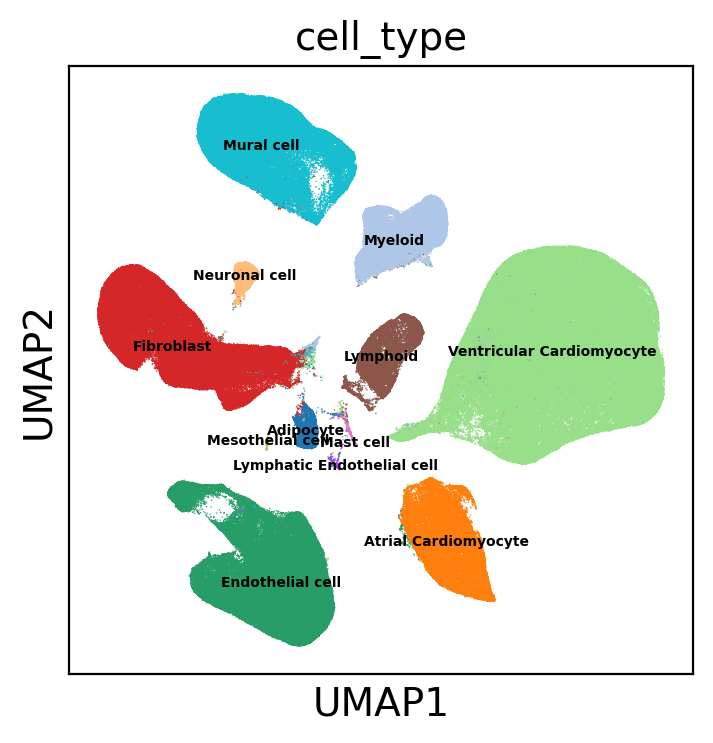

In [25]:
sc.pl.umap(adata, color=['cell_type'], size=1, legend_loc='on data', legend_fontsize=5)

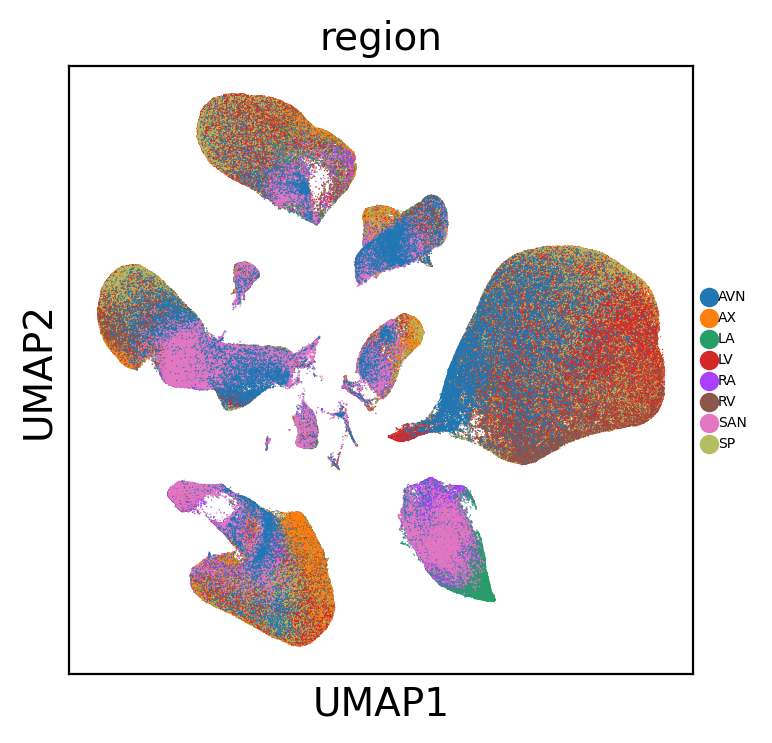

In [26]:
sc.pl.umap(adata, color=['region'], size=1, legend_fontsize=5)

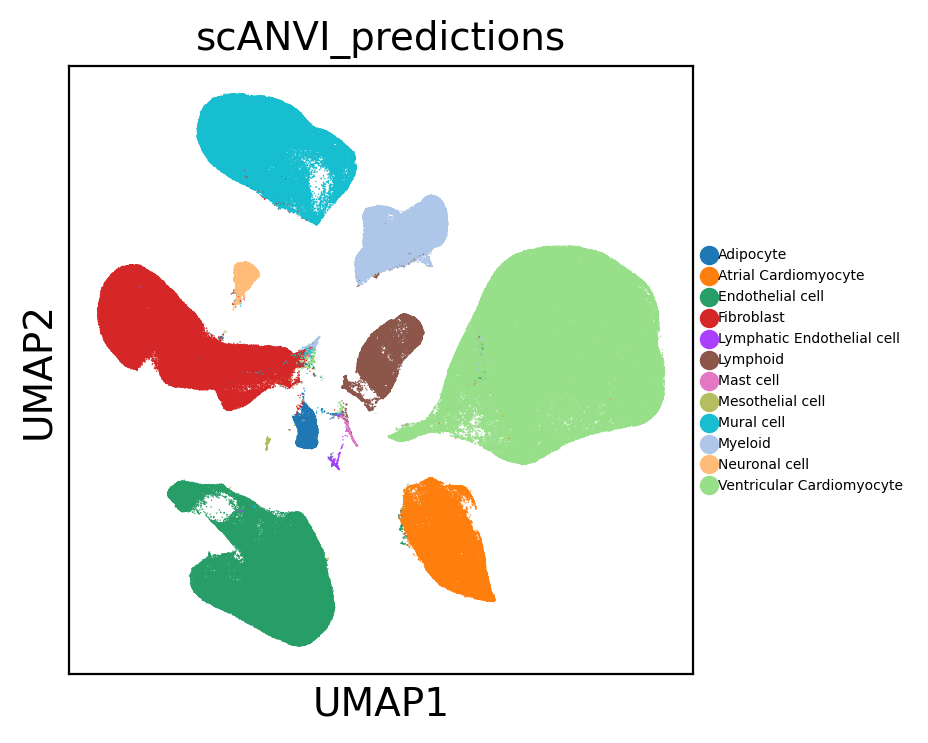

In [27]:
sc.pl.umap(adata, color=['scANVI_predictions'], size=1, legend_fontsize=5)

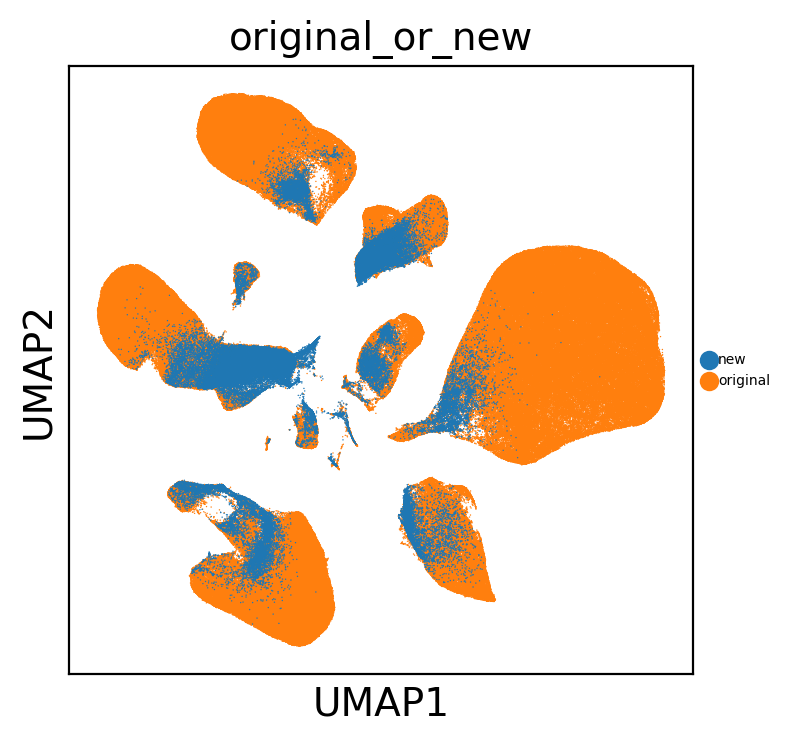

In [28]:
sc.pl.umap(adata, color=['original_or_new'], size=1, legend_fontsize=5)

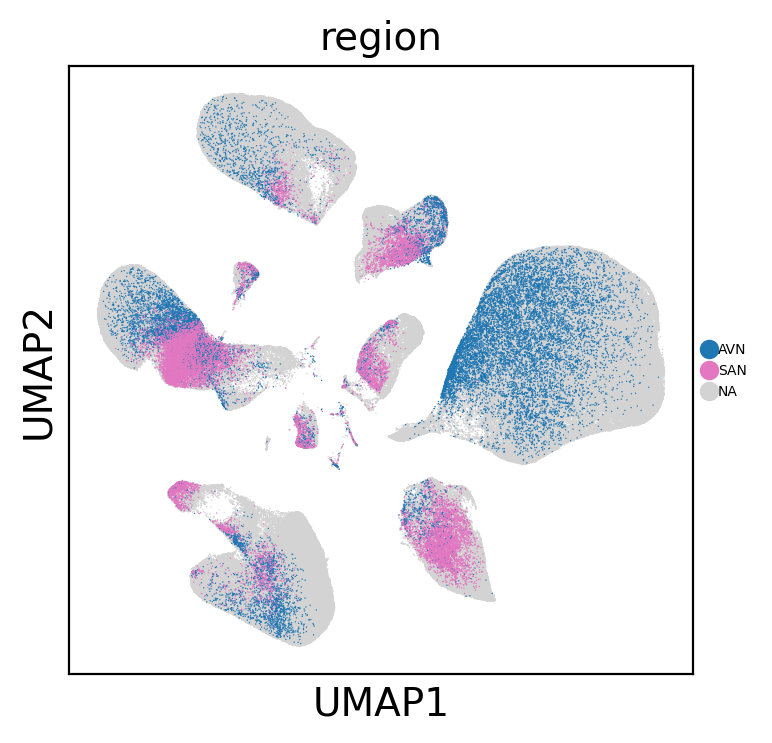

In [29]:
sc.pl.umap(adata[adata.obs['original_or_new']=='original'], color=['region'], groups=['SAN','AVN'], 
           size=1, legend_fontsize=5)

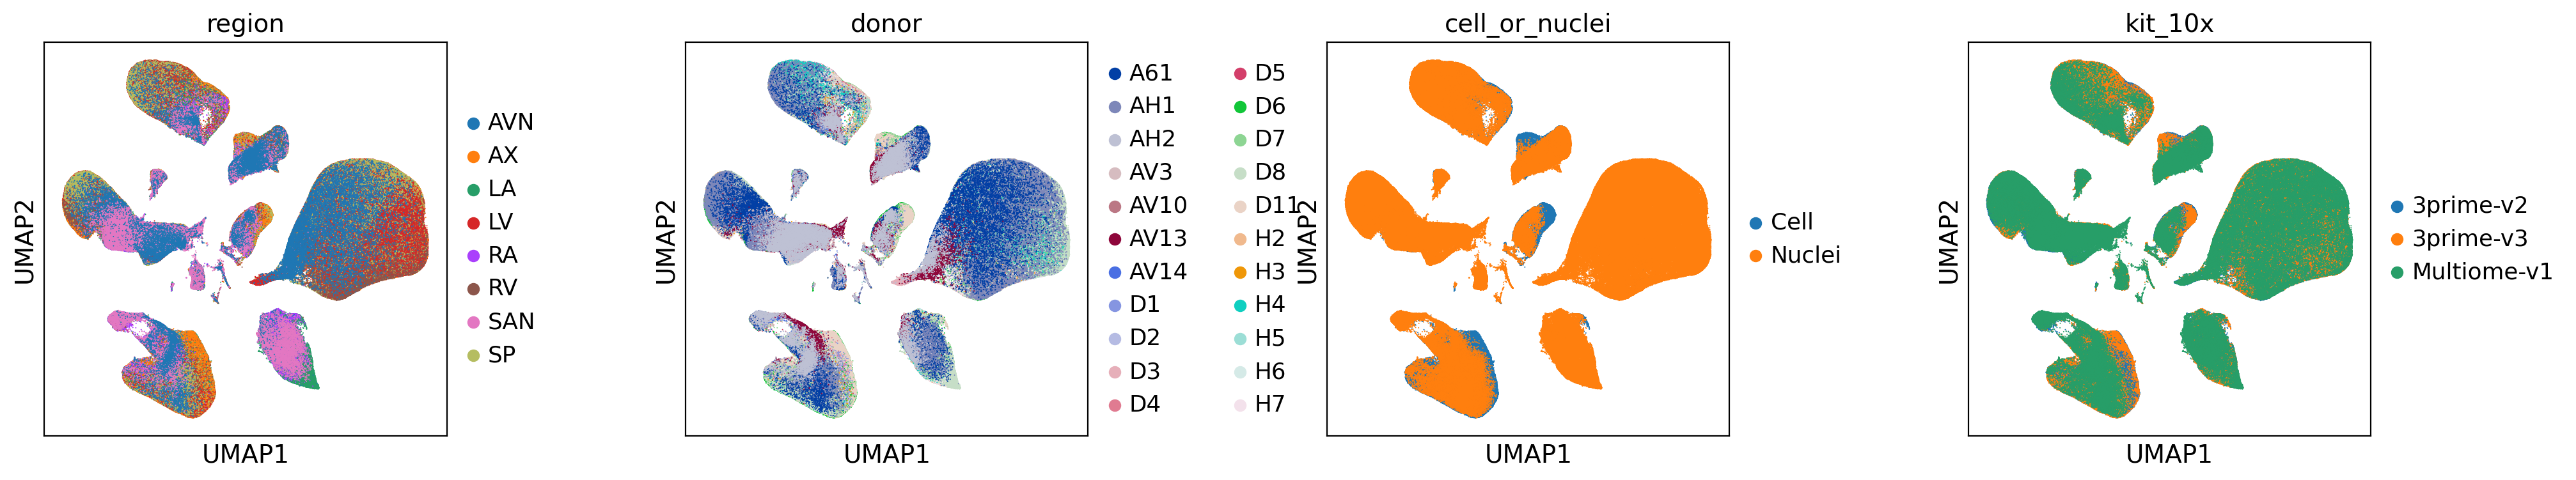

In [30]:
sc.pl.umap(adata, color=['region','donor','cell_or_nuclei','kit_10x'], size=2, wspace=0.45)

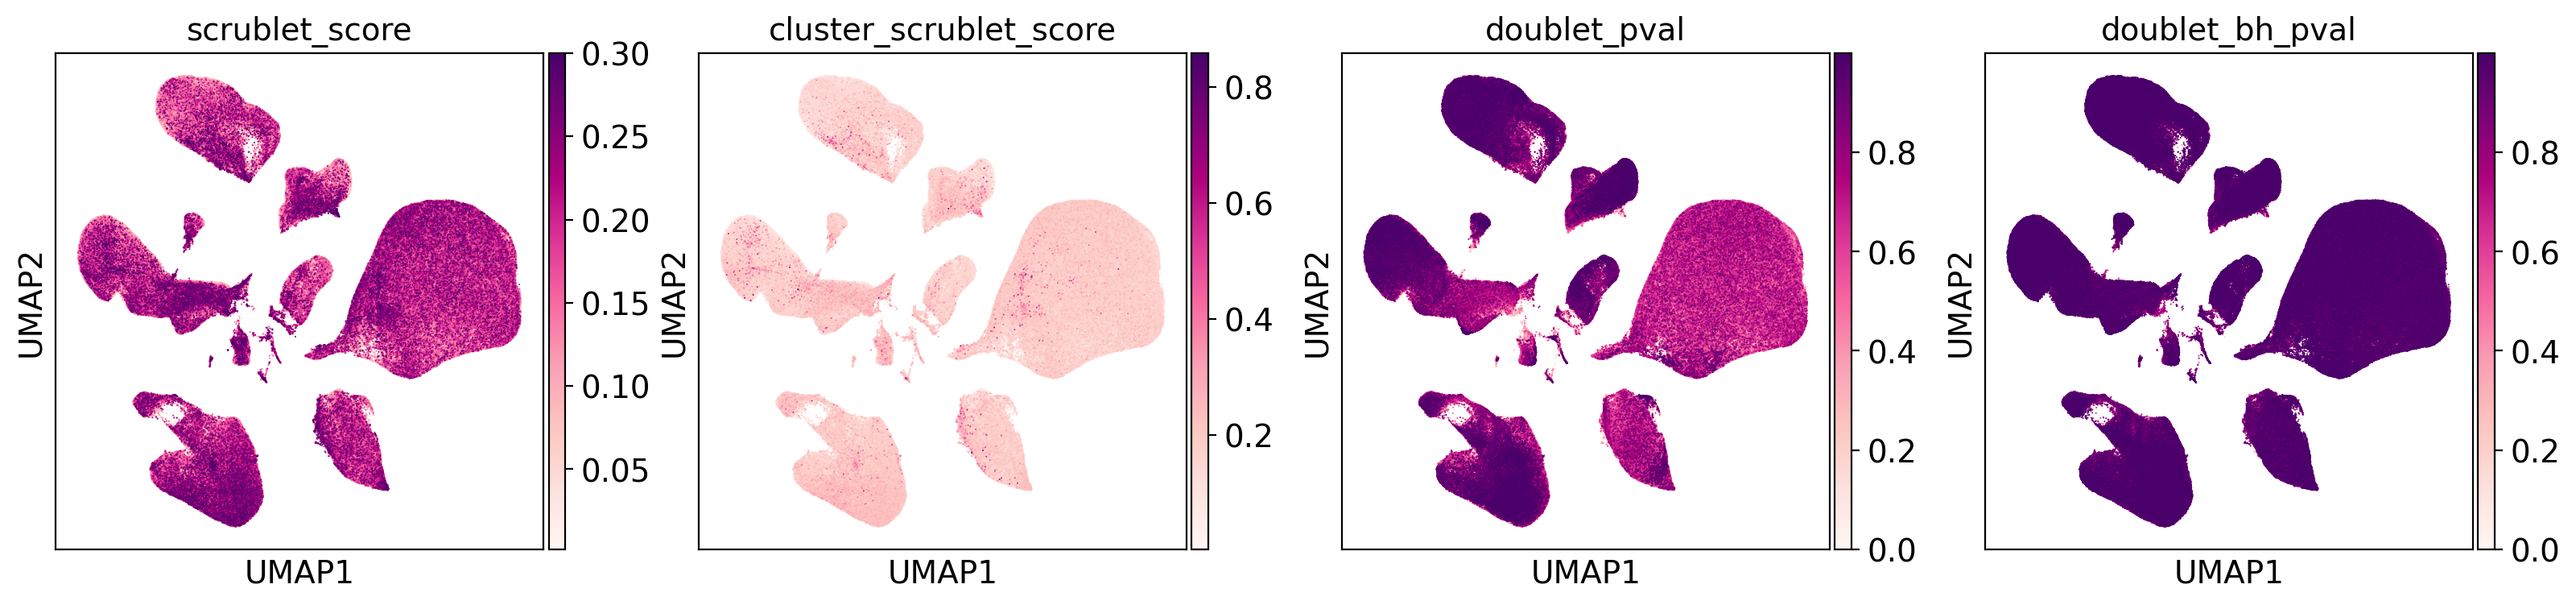

In [31]:
sc.pl.umap(adata, color=['scrublet_score','cluster_scrublet_score','doublet_pval','doublet_bh_pval'], size=2, wspace=0.2, ncols=5)

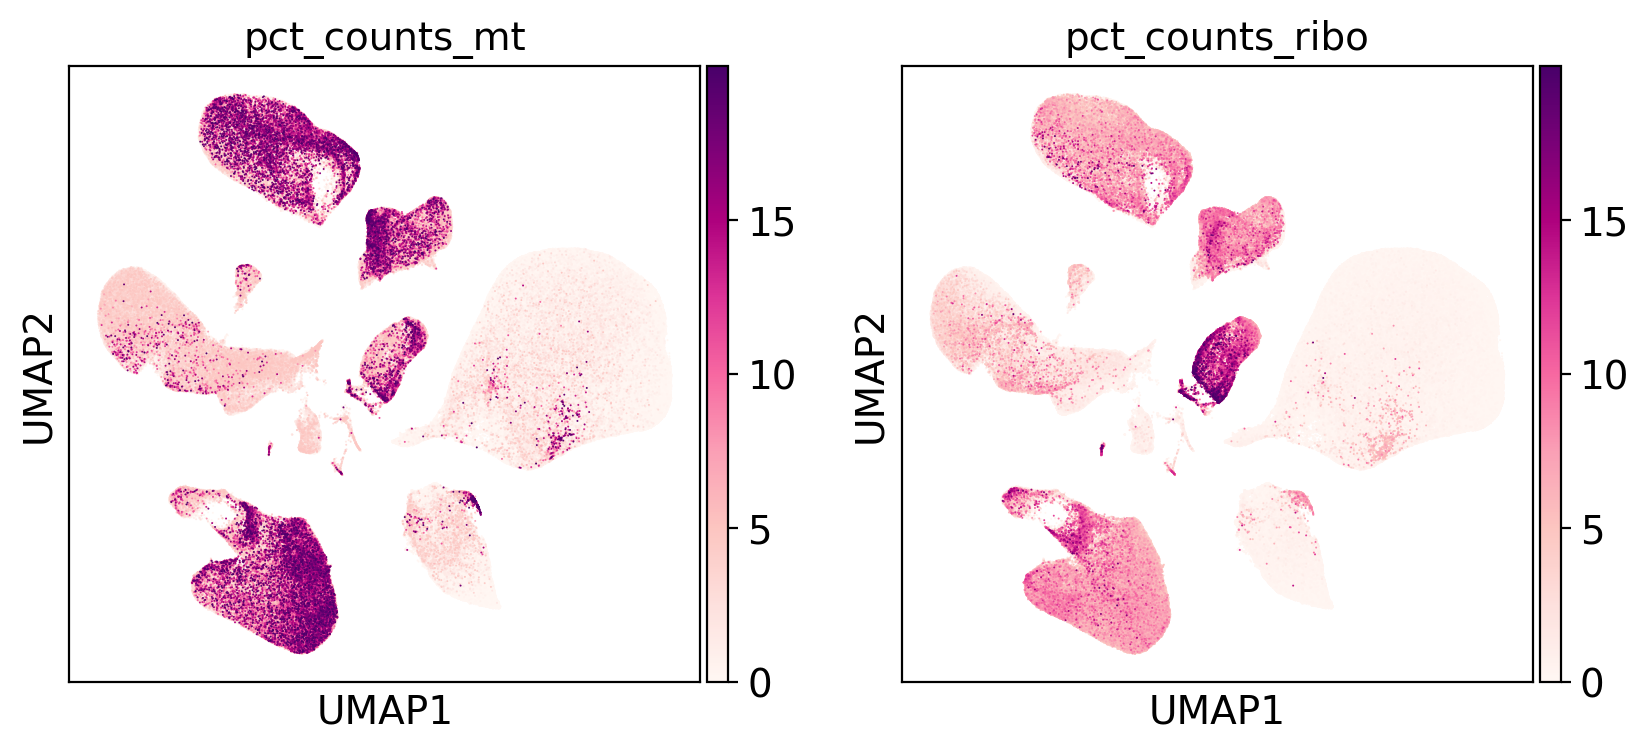

In [32]:
sc.pl.umap(adata, color=['pct_counts_mt','pct_counts_ribo'], size=2, wspace=0.2, ncols=5)

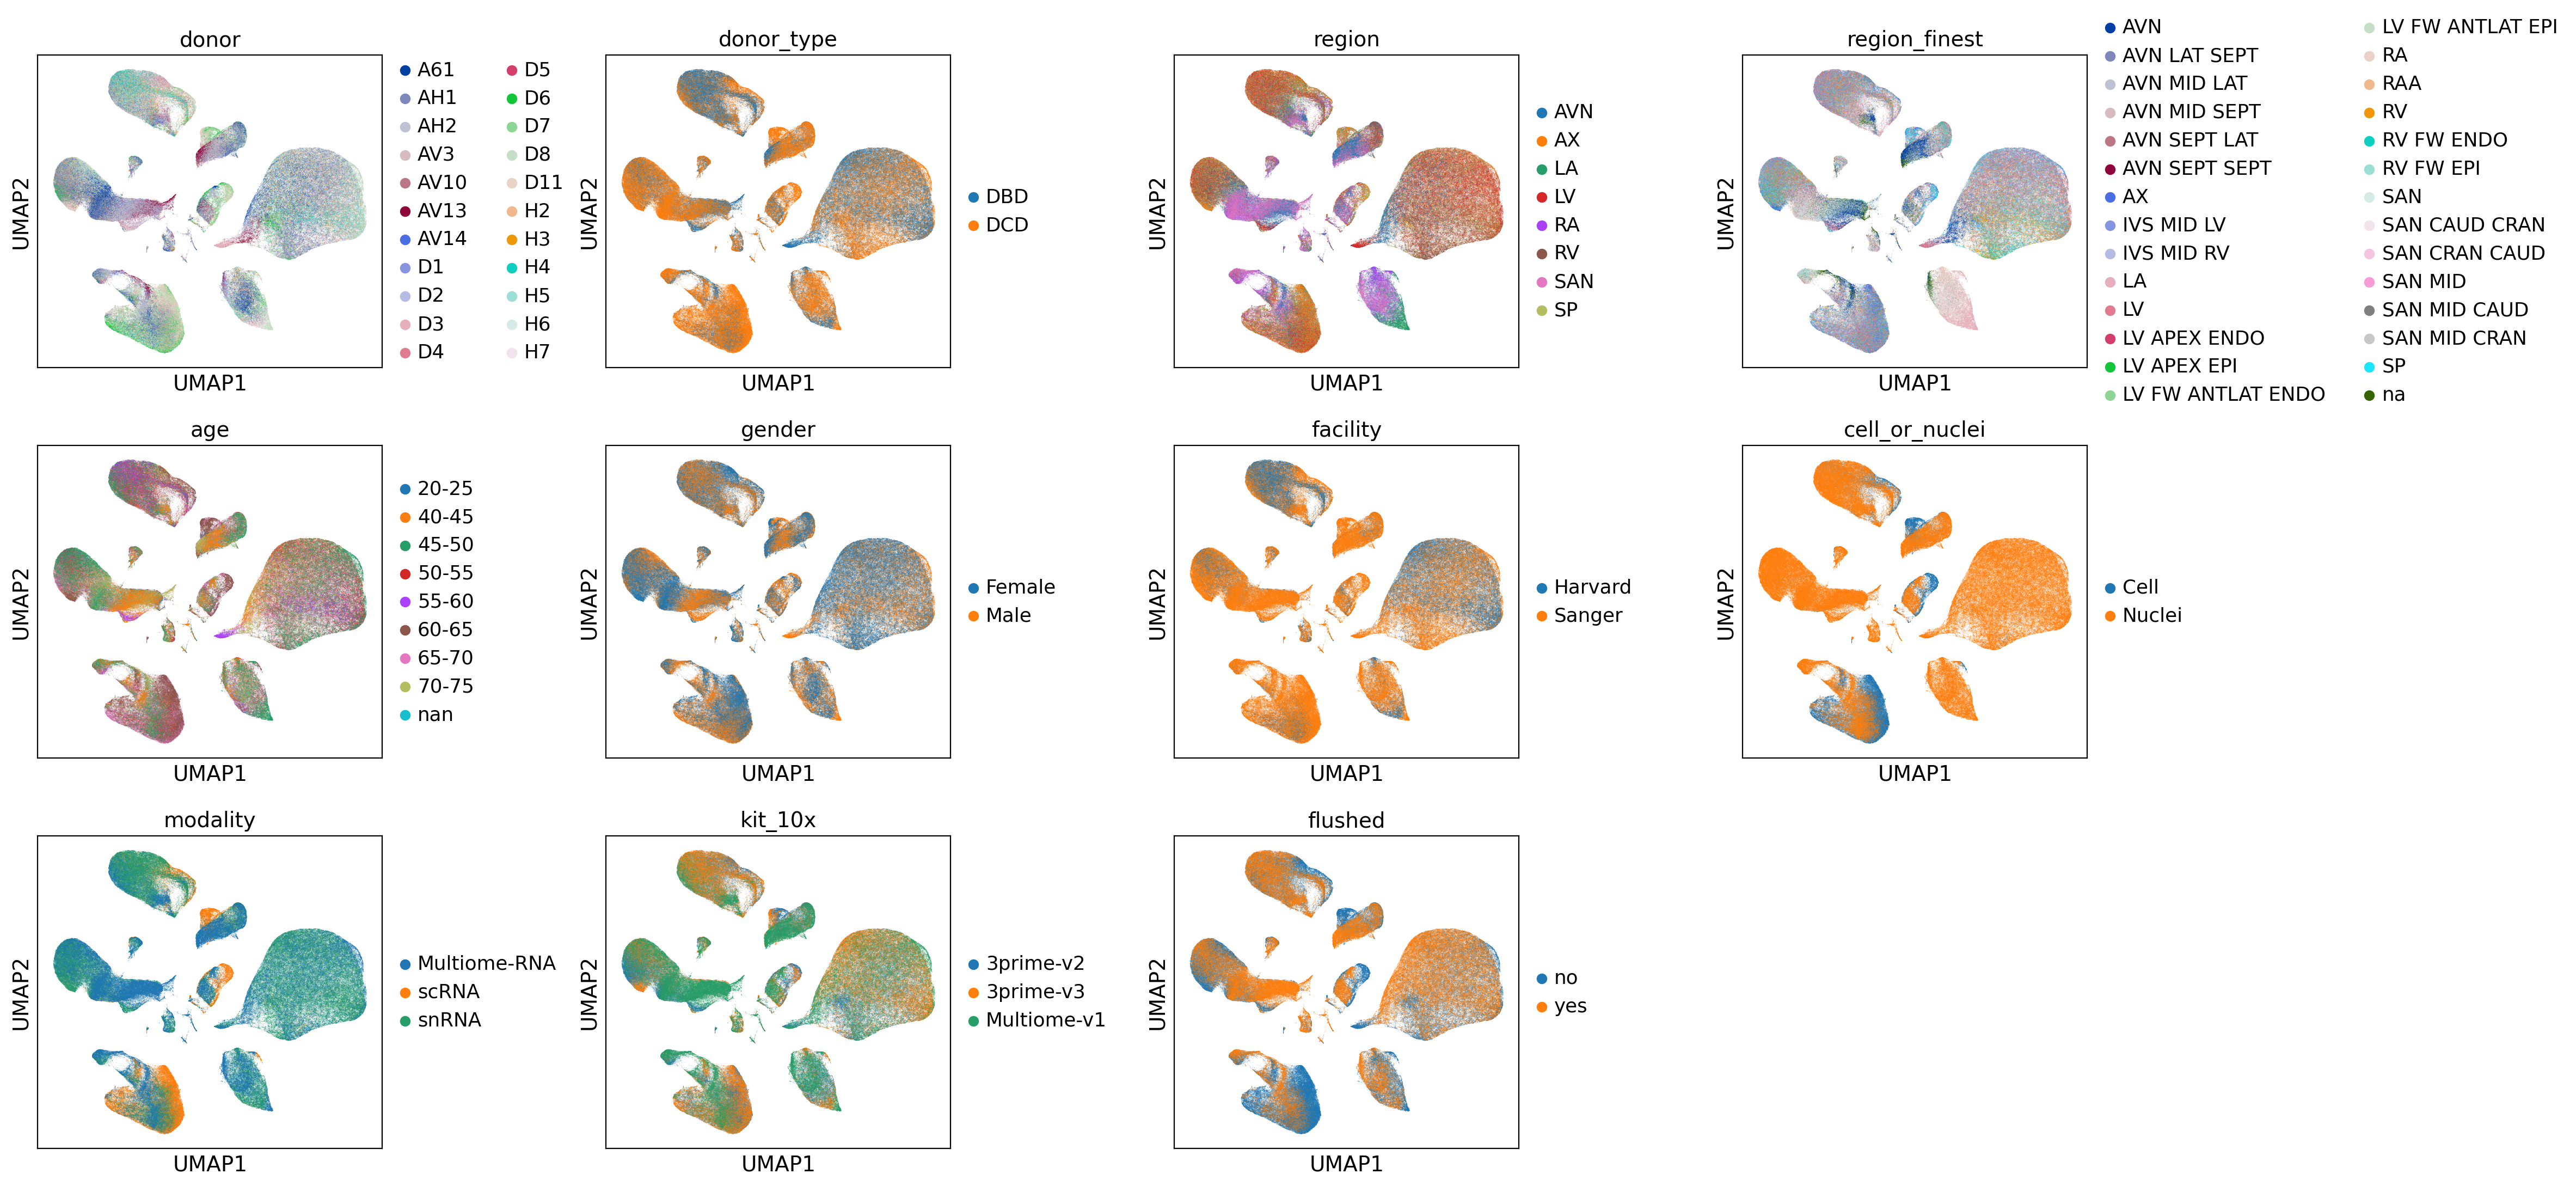

In [33]:
sc.pl.umap(adata, color=['donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed'], wspace=0.5)

In [34]:
adata.write('/nfs/team205/heart/anndata_objects/8regions/RNA_adult_full_scArches.h5ad')

In [5]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/RNA_adult_full_scArches.h5ad')
adata

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'cell_type_colors', 'leiden', 'neighbors', 'original_or_new_colors', 'region_colors', 'scANVI_prediction

## (Add scNym labels)

In [19]:
pd.crosstab(adata.obs.loc[adata_new.obs_names,'cell_type'],
           adata.obs.loc[adata_new.obs_names,'cell_state_scNym']).T

cell_type         Adipocyte  Atrial Cardiomyocyte  Endothelial cell  \
cell_state_scNym                                                      
Adip1                   618                     0                 0   
Adip2                   312                     0                 2   
Adip3                    75                     0                 0   
B                         0                     0                 0   
B_plasma                  1                     0                 2   
CD14+Mo                   0                     0                 0   
CD16+Mo                   0                     0                 0   
CD4+T_act                 8                     1                 0   
CD4+T_naive               4                     0                 5   
CD8+T_cytox               0                     0                 0   
CD8+T_em                  0                     0                 0   
CD8+T_te                  0                     0                 0   
CD8+T_trans               1                     0                 0   
DC                        0                     0                 0   
EC10_CMC-like             0                     1              2272   
EC1_cap                   0                     0               145   
EC2_cap                   0                     0                27   
EC3_cap                   0                     0                16   
EC4_immune                0                     0              1490   
EC5_art                   0                     0               819   
EC6_ven                   1                     0              1545   
EC7_endocardial           1                     0              2092   
EC8_ln                    2                     0               106   
FB1                       0                     0                 0   
FB2                       6                     0                 1   
FB3                      10                     0                18   
FB4_activated             3                     0                 3   
FB5                       1                     0                 0   
FB6                       2                     0                 3   
ILC                       1                     0                 0   
LYVE1+IGF1+MP             0                     0                 0   
LYVE1+MP_cycling          1                     0                 0   
LYVE1+TIMD4+MP            0                     0                 1   
MAIT-like                 0                     0                 0   
Mast                      2                     0                 2   
Meso                     11                     1                 3   
MoMP                     15                     0                 2   
NC1_glial                15                     4                19   
NC2_glial_NGF+           16                     5                 3   
NC5_glial                 0                     0                 0   
NK_CD16hi                 0                     0                 0   
NK_CD56hi                 1                     1                 0   
Neut                      0                     0                 0   
PC1_vent                  1                     0                 0   
PC2_atria                24                     0               124   
PC3_str                   2                     0                 9   
PC4_CMC-like              0                     0                 1   
SMC1_basic                0                     0                 3   
SMC2_art                  3                     0                12   
T/NK_cycling              0                     0                 0   
aCM1                      1                   669                11   
aCM2                     35                  2609                 1   
aCM3                      2                   558                14   
aCM4                      3                  1403                11   
vCM1                    

## Check

In [20]:
# check where the cluster 20 cells fall into
clus20_cells = list(pd.read_csv('clus20_index.csv')['barcode'])

adata.obs['clus20']='No'
clus20_cells = list(set(clus20_cells).intersection(adata.obs_names))
adata.obs.loc[clus20_cells,'clus20']='Yes'
sum(adata.obs['clus20']=='Yes')

202

In [21]:
pd.crosstab(adata.obs['cell_type'],adata.obs['clus20'])

clus20                          No  Yes
cell_type                              
Adipocyte                     6343    4
Atrial Cardiomyocyte         45626  180
Endothelial cell            131505    0
Fibroblast                  138055    0
Lymphatic Endothelial cell    1295    0
Lymphoid                     24921    1
Mast cell                     1853    0
Mesothelial cell              1053    4
Mural cell                  104592    1
Myeloid                      51426    0
Neuronal cell                 6621    1
Ventricular Cardiomyocyte   190804   11

In [22]:
pd.set_option('display.max_rows', 100)
pd.crosstab(adata.obs['region'],adata.obs['clus20'])

clus20      No  Yes
region             
AVN      49019    0
AX      102221    0
LA       74501    0
LV      148429    0
RA       57495    0
RV      104454    0
SAN      68951  202
SP       99024    0

## Marker check

In [ ]:
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'RdPu',)

adata_lognorm = adata.copy()
## filter and lognormalised
sc.pp.filter_genes(adata_lognorm, min_cells=3)
sc.pp.normalize_total(adata_lognorm, target_sum=1e4)
sc.pp.log1p(adata_lognorm)

genename_column='gene_name-new'

marker_genes_dict = {
    'vCM': ['MYH7', 'MYL2', 'FHL2'],
    'aCM': ['NPPA', 'MYL7', 'MYL4'],
    'Pcell':['HCN1','HCN4','CACNA1D','TBX3','SHOX2'],
    'FB': ['DCN', 'GCN', 'PDGFRA'],
    'EC': ['VWF', 'PECAM1', 'CDH5','LYVE1','CCL21'],
    'Peri': ['RGS5', 'ABCC9', 'KCNJ8'],
    'SMC': ['MYH11', 'TAGLN', 'ACTA2'],
    'Meso': ['MSLN', 'WT1', 'BNC1'],
    'Neuro': ['PLP1', 'NRXN1', 'NRXN3'],
    'Adipo': ['GPAM', 'FASN', 'LEP'],
    'Myelo': ['CD14', 'C1QA', 'CD68'],
    'Lymph': ['CD8A', 'IL7R', 'CD40LG','CD19','SDC1','IGHG1','IGHA1'],
    'Mast': ['KIT', 'CPA3'],
}

for k, v in marker_genes_dict.items():
    marker_genes_dict[k] = [x for x in v if x in list(adata_lognorm.raw.var[genename_column])]

sc.pl.dotplot(adata_lognorm, marker_genes_dict, 
              groupby='cell_type',
              dendrogram=False,
              use_raw=True,
              gene_symbols=genename_column,
              standard_scale="var",
              color_map="Reds",
             # swap_axes=True
             )

In [26]:
adata

AnnData object with n_obs × n_vars = 704296 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'n_counts', '_scvi_batch', '_scvi_labels', 'clus20', 'doublet_cls', 'original_or_new', 'batch', 'scANVI_predictions', 'leiden_scArches'
    var: 'gene_name-new', 'gene_name_scRNA-0-original', 'gene_name_snRNA-1-original', 'gene_name_multiome-2-original'
    uns: 'cell_type_colors', 'leiden', 'neighbors', 'original_or_new_colors', 'region_colors', 'scANVI_prediction